In [91]:
#import trio
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data preparation pkgs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#metrics
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

## Widget to upload the data file

In [52]:
from google.colab import files
files.upload()

Saving audit_data.csv to audit_data (1).csv


{'audit_data.csv': b'Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk\r\n3.89,23,4.18,0.6,2.508,2.5,0.2,0.5,6.68,5,0.2,1,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1\r\n3.89,6,0,0.2,0,4.83,0.2,0.966,4.83,5,0.2,1,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0,2,2.554,0.4,0.5,0.5108,0\r\n3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,0.2,1,0,0.2,0,2,0.2,0.4,0,0.2,0,2,1.548,0.4,0.5,0.3096,0\r\n3.89,6,0,0.2,0,10.8,0.6,6.48,10.8,6,0.6,3.6,11.75,0.6,7.05,2,0.2,0.4,0,0.2,0,4.4,17.53,0.4,0.5,3.506,1\r\n3.89,6,0,0.2,0,0.08,0.2,0.016,0.08,5,0.2,1,0,0.2,0,2,0.2,0.4,0,0.2,0,2,1.416,0.4,0.5,0.2832,0\r\n3.89,6,0,0.2,0,0.83,0.2,0.166,0.83,5,0.2,1,2.95,0.2,0.59,2,0.2,0.4,0,0.2,0,2,2.156,0.4,0.5,0.4312,0\r\n3.89,7,1.1,0.4,0.44,7.41,0.4,2.964,8.51,5,0.2,1,44.95,0.6,26.97,2,0.2,0.4,0,0.2,0,3.2,31.774,0.4,0.5,6.3548,1\r\n3.

# Data Source: Dataset is available on Kaggle.
Find here: https://www.kaggle.com/sid321axn/audit-data

In [53]:
data = pd.read_csv("audit_data.csv")

In [54]:
data

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [92]:
!pip install pycaret

     |████████████████████████████████| 266kB 13.7MB/s 
     |████████████████████████████████| 6.8MB 25.0MB/s 
     |████████████████████████████████| 215kB 61.2MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 102kB 7.6MB/s 
     |████████████████████████████████| 245kB 50.9MB/s 
     |████████████████████████████████| 14.2MB 244kB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 2.0MB 45.4MB/s 
     |████████████████████████████████| 1.7MB 37.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 276kB 52.7MB/s 
     |████████████████████████████████| 1.2MB 47.9MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 1.1MB 44.6MB/s 
     |████████████████████████████████| 3.2MB 44.1MB/s

## EDA

## Check Missing value

In [55]:
#check missing value
data.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [57]:
#fill the missing value in Money_Value column
data['Money_Value'] = data['Money_Value'].fillna(data['Money_Value'].mean())

In [58]:
data.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

## So, no missing value now as we filled the 1 missing value with the mean of the column as it is a numerical column.

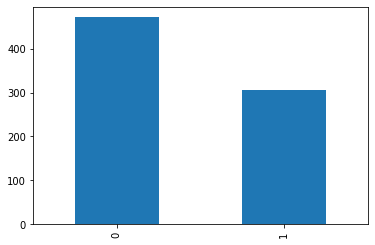

In [59]:
#Plotting count values of Positive and Negative

data['Risk'].value_counts().plot(kind = 'bar')

### 1 means Fraudulent and 0 means Not Fraudulent

#Feature Engineering

In [60]:
#Let's create a copy of our main data
def data_preparation(df):
  df = df.copy()
  return df

#### We will do all the processing and feature engineering step on the new_data

In [61]:
new_data = data_preparation(data)

In [62]:
new_data

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [63]:
#check the mising value once more
new_data.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [64]:
location_dummies = pd.get_dummies(new_data['LOCATION_ID'], prefix='location')

In [65]:
new_data = pd.concat([new_data, location_dummies], axis=1)

In [66]:
new_data = new_data.drop('LOCATION_ID', axis=1)

In [67]:
new_data

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,location_1,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_2,location_20,location_21,location_22,location_23,location_24,location_25,location_27,location_28,location_29,location_3,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_4,location_40,location_41,location_42,location_43,location_44,location_5,location_6,location_7,location_8,location_9,location_LOHARU,location_NUH,location_SAFIDON
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
X = new_data.drop("Risk", axis=1)
y = new_data['Risk']

In [69]:
X

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,location_1,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_2,location_20,location_21,location_22,location_23,location_24,location_25,location_27,location_28,location_29,location_3,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_4,location_40,location_41,location_42,location_43,location_44,location_5,location_6,location_7,location_8,location_9,location_LOHARU,location_NUH,location_SAFIDON
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
y

0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 776, dtype: int64

In [71]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, shuffle=True, random_state=21)

In [72]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

543
233
543
233


In [73]:
X_train

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,location_1,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_2,location_20,location_21,location_22,location_23,location_24,location_25,location_27,location_28,location_29,location_3,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_4,location_40,location_41,location_42,location_43,location_44,location_5,location_6,location_7,location_8,location_9,location_LOHARU,location_NUH,location_SAFIDON
109,3.89,0.00,0.2,0.000,0.06,0.2,0.012,0.06,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.412,0.4,0.5,0.2824,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
690,55.57,0.00,0.2,0.000,11.68,0.6,7.008,11.68,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,3.2,8.408,0.4,0.5,1.6816,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,2.72,1.35,0.4,0.540,0.00,0.2,0.000,1.35,6.0,0.6,3.6,680.14,0.6,408.084,2,0.2,0.4,0,0.2,0.0,3.4,412.624,0.4,0.5,82.5248,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
640,55.57,0.51,0.2,0.102,1.36,0.4,0.544,1.87,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.6,2.046,0.4,0.5,0.4092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
27,3.89,6.85,0.6,4.110,31.76,0.6,19.056,38.61,5.0,0.2,1.0,1.46,0.2,0.292,2,0.2,0.4,0,0.2,0.0,3.6,24.858,0.4,0.5,4.9716,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.41,9.97,0.6,5.982,88.73,0.6,53.238,98.70,5.0,0.2,1.0,10.27,0.6,6.162,2,0.2,0.4,0,0.2,0.0,4.0,66.782,0.4,0.5,13.3564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
368,1.99,1.27,0.4,0.508,0.00,0.2,0.000,1.27,5.0,0.2,1.0,175.90,0.6,105.540,2,0.2,0.4,0,0.2,0.0,2.6,107.448,0.4,0.5,21.4896,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,3.89,0.00,0.2,0.000,20.71,0.6,12.426,20.71,5.0,0.2,1.0,20.79,0.6,12.474,2,0.2,0.4,2,0.6,1.2,4.0,27.500,1.6,0.5,22.0000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
y_test

623    0
42     0
526    0
537    0
680    0
      ..
441    0
457    1
113    0
317    0
57     1
Name: Risk, Length: 233, dtype: int64

In [75]:
#Scale the data to make it in the same range
# Only the X_train 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [76]:
X_train

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,location_1,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_2,location_20,location_21,location_22,location_23,location_24,location_25,location_27,location_28,location_29,location_3,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_4,location_40,location_41,location_42,location_43,location_44,location_5,location_6,location_7,location_8,location_9,location_LOHARU,location_NUH,location_SAFIDON
109,-0.667511,-0.409886,-0.873827,-0.375346,-0.406934,-0.671049,-0.396797,-0.463324,-0.242283,-0.288725,-0.276977,-0.206287,-0.558040,-0.200772,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,-0.822824,-0.317679,-0.382608,0.0,-0.329459,-0.114279,-0.179776,-0.258452,4.754860,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703,-0.210311,-0.042954,-0.042954,-0.060802,-0.074536,-0.105703,-0.042954,-0.114279,-0.215041,-0.074536,-0.042954,-0.042954,-0.096404,-0.042954,-0.254374,-0.210311,-0.074536,-0.32196,-0.281998,0.0,-0.042954,-0.042954
690,1.455599,-0.409886,-0.873827,-0.375346,0.109506,1.679787,0.119891,-0.005720,-0.242283,-0.288725,-0.276977,-0.206287,-0.558040,-0.200772,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,0.592572,-0.169901,-0.382608,0.0,-0.241757,-0.114279,-0.179776,3.869184,-0.210311,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703,-0.210311,-0.042954,-0.042954,-0.060802,-0.074536,-0.105703,-0.042954,-0.114279,-0.215041,-0.074536,-0.042954,-0.042954,-0.096404,-0.042954,-0.254374,-0.210311,-0.074536,-0.32196,-0.281998,0.0,-0.042954,-0.042954
247,-0.715577,-0.201427,0.277843,-0.237551,-0.409600,-0.671049,-0.397683,-0.412523,3.362092,4.768623,4.568574,10.198649,1.977655,10.195978,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,0.828472,8.368406,-0.382608,0.0,4.825542,8.750510,-0.179776,-0.258452,-0.210311,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703,-0.210311,-0.042954,-0.042954,-0.060802,-0.074536,-0.105703,-0.042954,-0.114279,-0.215041,-0.074536,-0.042954,-0.042954,-0.096404,-0.042954,-0.254374,-0.210311,-0.074536,-0.32196,-0.281998,0.0,-0.042954,-0.042954
640,1.455599,-0.331135,-0.873827,-0.349318,-0.349156,0.504369,-0.357506,-0.392045,-0.242283,-0.288725,-0.276977,-0.206287,-0.558040,-0.200772,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,-0.115126,-0.304287,-0.382608,0.0,-0.321511,-0.114279,-0.179776,-0.258452,-0.210311,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703,-0.210311,-0.042954,-0.042954,-0.060802,-0.074536,-0.105703,-0.042954,-0.114279,4.650269,-0.074536,-0.042954,-0.042954,-0.096404,-0.042954,-0.254374,-0.210311,-0.074536,-0.32196,-0.281998,0.0,-0.042954,-0.042954
27,-0.667511,0.647852,1.429513,0.673426,1.001942,1.679787,1.009692,1.054804,-0.242283,-0.288725,-0.276977,-0.183951,-0.558040,-0.193333,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,1.064371,0.177574,-0.382608,0.0,-0.035537,-0.114279,-0.179776,-0.258452,-0.210311,6.147009,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703,-0.210311,-0.042954,-0.04

In [77]:
X_test

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,location_1,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_2,location_20,location_21,location_22,location_23,location_24,location_25,location_27,location_28,location_29,location_3,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_4,location_40,location_41,location_42,location_43,location_44,location_5,location_6,location_7,location_8,location_9,location_LOHARU,location_NUH,location_SAFIDON
623,1.455599,-0.332679,-0.873827,-0.349829,-0.409600,-0.671049,-0.397683,-0.445997,-0.242283,-0.288725,-0.276977,-0.206287,-0.558040,-0.200772,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,-0.822824,-0.315820,-0.382608,0.0,-0.328356,-0.114279,-0.179776,-0.258452,-0.210311,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,13.416408,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703,-0.210311,-0.042954,-0.042954,-0.060802,-0.074536,-0.105703,-0.042954,-0.114279,-0.215041,-0.074536,-0.042954,-0.042954,-0.096404,-0.042954,-0.254374,-0.210311,-0.074536,-0.321960,-0.281998,0.0,-0.042954,-0.042954
42,-0.667511,-0.409886,-0.873827,-0.375346,-0.308712,-0.671049,-0.364153,-0.376293,-0.242283,-0.288725,-0.276977,-0.166205,-0.558040,-0.187422,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,-0.822824,-0.297274,-0.382608,0.0,-0.317349,-0.114279,-0.179776,-0.258452,-0.210311,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,3.453776,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703,-0.210311,-0.042954,-0.042954,-0.060802,-0.074536,-0.105703,-0.042954,-0.114279,-0.215041,-0.074536,-0.042954,-0.042954,-0.096404,-0.042954,-0.254374,-0.210311,-0.074536,-0.321960,-0.281998,0.0,-0.042954,-0.042954
526,0.060459,-0.365106,-0.873827,-0.360546,-0.394934,-0.671049,-0.392808,-0.441271,-0.242283,-0.288725,-0.276977,-0.206287,-0.558040,-0.200772,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,-0.822824,-0.315313,-0.382608,0.0,-0.328055,-0.114279,-0.179776,-0.258452,-0.210311,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703,-0.210311,-0.042954,-0.042954,-0.060802,-0.074536,-0.105703,-0.042954,-0.114279,-0.215041,-0.074536,-0.042954,-0.042954,-0.096404,-0.042954,-0.254374,-0.210311,-0.074536,3.105971,-0.281998,0.0,-0.042954,-0.042954
537,0.060459,-0.409886,-0.873827,-0.375346,-0.409600,-0.671049,-0.397683,-0.465687,-0.242283,-0.288725,-0.276977,-0.205828,-0.558040,-0.200619,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,-0.822824,-0.317806,-0.382608,0.0,-0.329534,-0.114279,-0.179776,-0.258452,-0.210311,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,9.460444,-0.210311,-0.042954,-0.042954,-0.060802,-0.074536,-0.105703,-0.042954,-0.114279,-0.215041,-0.074536,-0.042954,-0.042954,-0.096404,-0.042954,-0.254374,-0.210311,-0.074536,-0.321960,-0.281998,0.0,-0.042954,-0.042954
680,1.455599,-0.377459,-0.873827,-0.364629,-0.409600,-0.671049,-0.397683,-0.457417,-0.242283,-0.288725,-0.276977,-0.206287,-0.558040,-0.200772,-0.400131,-0.166968,-0.407263,-0.176104,-0.231349,-0.155881,-0.822824,-0.317045,-0.382608,0.0,-0.329083,-0.114279,-0.179776,-0.258452,-0.210311,-0.162681,-0.200574,-0.278174,-0.042954,-0.156615,-0.289538,-0.228748,-0.086146,-0.086146,-0.190419,-0.042954,-0.042954,-0.074536,-0.114279,-0.096404,-0.185164,-0.060802,-0.086146,-0.105703

In [78]:
y_train

109    0
690    1
247    1
640    0
27     1
      ..
120    1
368    1
48     1
772    0
207    1
Name: Risk, Length: 543, dtype: int64

## Model Training

In [83]:
logreg = LogisticRegression()
logreg_clf = logreg.fit(X_train, y_train)

In [85]:
d_tree = DecisionTreeClassifier()
d_tree_clf = d_tree.fit(X_train, y_train)

In [86]:
random_forest = RandomForestClassifier()
random_forest_clf = random_forest.fit(X_train, y_train)

In [87]:
xgboost = GradientBoostingClassifier()
xgboost_clf = xgboost.fit(X_train, y_train)

In [88]:
svm = SVC()
svm_clf = svm.fit(X_train, y_train)

In [89]:
linear_kernel = LinearSVC()
linear_kernel_clf = linear_kernel.fit(X_train, y_train)

# Evaluation

In [95]:
#Logistic Regression
score_log = logreg_clf.score(X_test, y_test)
score_d_tree = d_tree_clf.score(X_test, y_test)
score_random_forest = random_forest_clf.score(X_test, y_test)
score_xgboost = xgboost_clf.score(X_test, y_test)
score_svm = svm_clf.score(X_test, y_test)
score_kernel = linear_kernel_clf.score(X_test, y_test)
print("LOGISTIC REGRESSION:", score_log*100, "%")
print("Decision Tree:", score_d_tree*100, "%")
print("Random Forest:", score_random_forest*100, "%")
print("XGBOOST:", score_xgboost*100, "%")
print("SVM:", score_svm*100, "%")
print("LINEAR KERNEL:", score_kernel*100, "%")

LOGISTIC REGRESSION: 96.56652360515021 %
Decision Tree: 100.0 %
Random Forest: 100.0 %
XGBOOST: 100.0 %
SVM: 95.27896995708154 %
LINEAR KERNEL: 95.27896995708154 %


In [96]:
y_pred_logreg = logreg_clf.predict(X_test)
y_pred_dtree = d_tree_clf.predict(X_test)
y_pred_random = random_forest_clf.predict(X_test)
y_pred_xgboost = xgboost_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)
y_pred_linear = linear_kernel_clf.predict(X_test)

In [98]:
clf_logreg = classification_report(y_test, y_pred_logreg)
print(clf_logreg)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       140
           1       0.97      0.95      0.96        93

    accuracy                           0.97       233
   macro avg       0.97      0.96      0.96       233
weighted avg       0.97      0.97      0.97       233



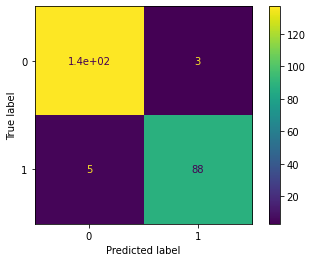

In [100]:
plot_confusion_matrix(logreg_clf, X_test, y_test)

In [101]:
clf_dtree = classification_report(y_test, y_pred_dtree)
print(clf_dtree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        93

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



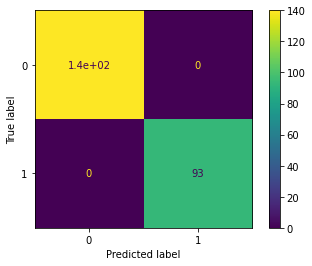

In [102]:
plot_confusion_matrix(d_tree_clf, X_test, y_test)

In [103]:
clf_random = classification_report(y_test, y_pred_random)
print(clf_random)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        93

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



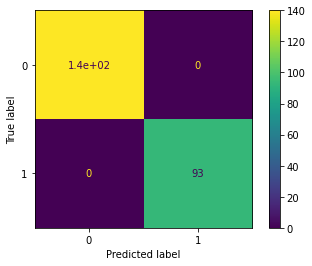

In [105]:
plot_confusion_matrix(random_forest_clf, X_test, y_test)

In [107]:
clf_xgboost = classification_report(y_test, y_pred_xgboost)
print(clf_xgboost)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        93

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



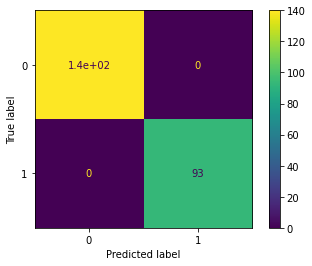

In [108]:
plot_confusion_matrix(xgboost_clf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       140
           1       0.98      0.90      0.94        93

    accuracy                           0.95       233
   macro avg       0.96      0.94      0.95       233
weighted avg       0.95      0.95      0.95       233



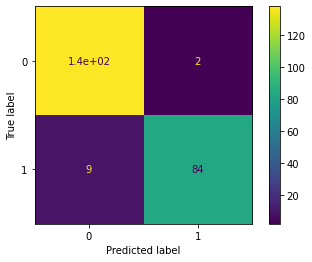

In [109]:
clf_svm = classification_report(y_test, y_pred_svm)
print(clf_svm)
plot_confusion_matrix(svm_clf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       140
           1       0.98      0.90      0.94        93

    accuracy                           0.95       233
   macro avg       0.96      0.94      0.95       233
weighted avg       0.95      0.95      0.95       233



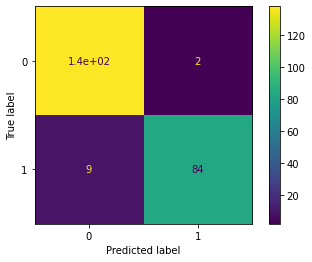

In [111]:
clf_kernel = classification_report(y_test, y_pred_linear)
print(clf_kernel)
plot_confusion_matrix(linear_kernel_clf, X_test, y_test)